## Protactinium Decay

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
from numpy import exp
from numpy.random import normal
from scipy.optimize import curve_fit

In [5]:
df = pd.read_csv("https://gist.githubusercontent.com/raquelhr/d1324510056353feeccf111d6b186a0d/raw/7b3bccc7917f3baa7ec1d919195d120083ee75e9/proctatinium_data.csv")
df.head()

,time,count_rate
0,0,32
1,5,28
2,10,29
3,15,28
4,20,25


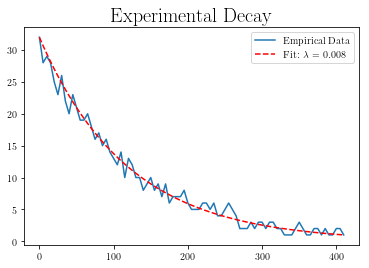

In [145]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


plt.plot(df.time, df.count_rate, label = 'Empirical Data')

def N(t,  lamb): 
    return 32 * exp(-lamb * t)

popt, pcov = curve_fit(N, df.time, df.count_rate)

plt.plot(df.time, N(df.time, *popt), 'r--', label='Fit: $\lambda$ = %5.3f' % tuple(popt))

plt.title('Experimental Decay', fontsize = 20)
plt.legend()
plt.show()

In [134]:
toc = time.time()
x = np.array([curve_fit(N, df.time, df.count_rate + normal())[0][0] for i in range(10000)])
tic = time.time()

print(tic - toc)

258.61537194252014


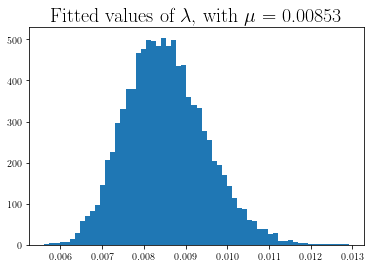

In [144]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.hist(x,bins = 60)

plt.title(f'Fitted values of $\lambda$, with $\mu$ = {np.mean(x):.5f}', fontsize = 20)
plt.show()